# REGULARIZATION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

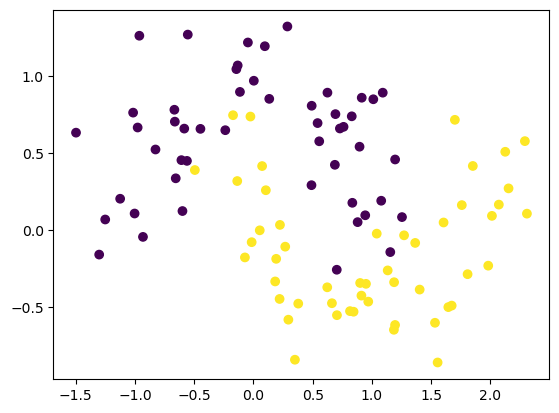

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


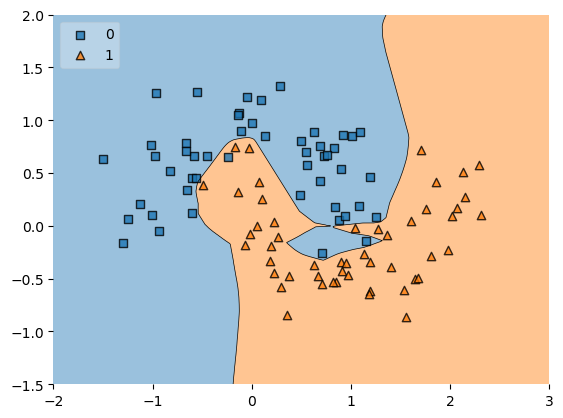

In [6]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

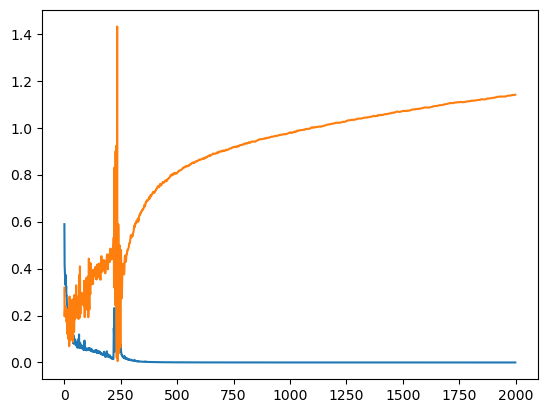

In [7]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [8]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


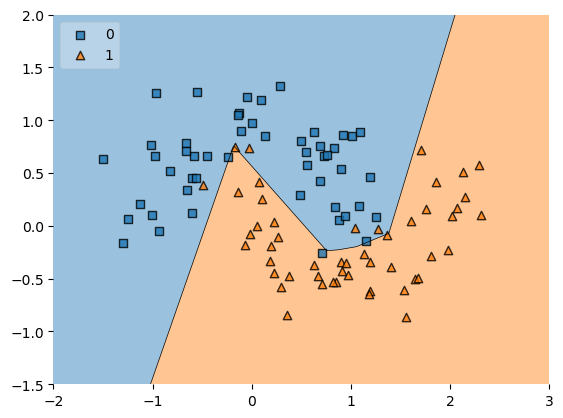

In [10]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

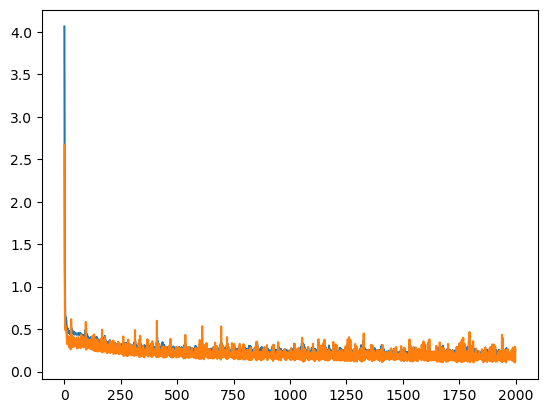

In [11]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [12]:
model1.get_weights()

[array([[ 7.27423513e-03,  1.76831871e-01,  4.71388474e-02,
          2.86136419e-01, -3.21266353e-01, -2.53257126e-01,
         -5.17282724e-01, -3.82545382e-01, -1.78038567e-01,
         -4.74538267e-01, -2.00688124e-01,  1.57519743e-01,
         -8.41616318e-02,  5.30518740e-02,  5.32451551e-03,
          4.11999449e-02, -4.69922900e-01, -1.65750738e-02,
          2.33506233e-01,  7.89557621e-02,  1.24225818e-01,
         -4.38640803e-01,  2.01548964e-01,  2.87989974e-01,
          3.28520536e-01, -1.11935630e-01, -5.13935983e-01,
          1.24839395e-01,  3.07632685e-01, -1.42439259e-02,
         -9.90405902e-02, -3.96396518e-01,  1.96627870e-01,
          2.72350907e-01,  1.51570097e-01,  2.53337115e-01,
         -5.50702631e-01, -5.12735367e-01, -4.37121153e-01,
         -1.22684702e-01, -4.33020949e-01,  2.03616321e-01,
          2.98306525e-01, -2.27747321e-01,  2.86181867e-02,
          2.61752188e-01, -3.25600833e-01,  1.88326880e-01,
         -6.70364350e-02, -5.32955825e-0

In [13]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

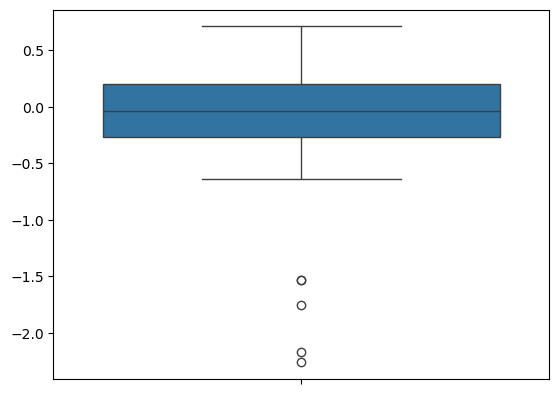

In [14]:
sns.boxplot(model1_weight_layer1)

<Axes: >

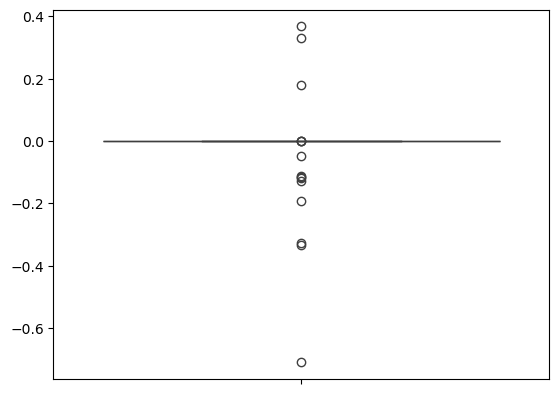

In [15]:
sns.boxplot(model2_weight_layer1)

In [16]:
model1_weight_layer1.min()

np.float32(-2.2609417)

In [17]:
model2_weight_layer1.min()

np.float32(-0.71039647)

Text(0.5, 1.0, 'Weight distributions of layer 1 (model1 vs model2)')

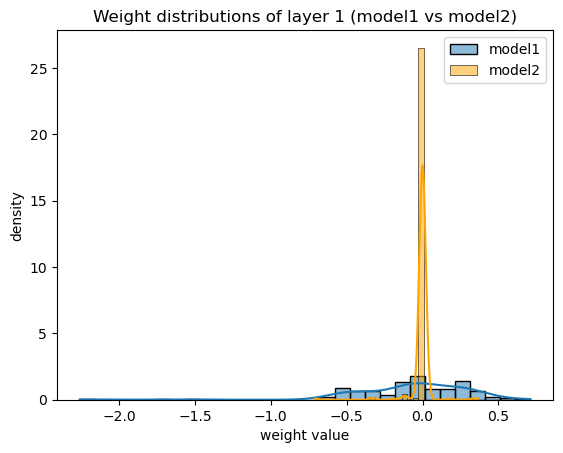

In [18]:
# seaborn.distplot is deprecated/removed in recent versions of seaborn.
# Use histplot with kde or kdeplot instead.
sns.histplot(model1_weight_layer1, kde=True, stat="density", bins=30, label='model1')
sns.histplot(model2_weight_layer1, kde=True, stat="density", bins=30, label='model2', color='orange')
plt.legend()
plt.xlabel('weight value')
plt.ylabel('density')
plt.title('Weight distributions of layer 1 (model1 vs model2)')